In [251]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import copy

In [252]:
data = pd.read_csv("actors.csv")
names = data['title'].tolist()
names = names[5000:6000]
print(names)

['Karen_Pendleton', 'Anne-Marie_Johnson', 'Kenneth_Tobey', 'Dorris_Bowdon', 'Richard_Jordan', 'Lee_Morse', 'Blossom_Rock', 'Dick_Durock', 'Ashley_Eckstein', 'Justin_Long', 'Robert_Earl_Jones', 'Meg_Foster', 'Erika_Flores', 'Tisha_Sterling', 'Jack_Carson', 'Tim_Rooney', 'Ross_Martin', 'Amy_Ryan', 'John_Halliday_(actor)', 'Paul_Dooley', 'Paul_Stewart_(actor)', 'Joan_Evans_(actress)', 'Trinidad_Silva', 'Virgil_Frye', 'Vinnette_Justine_Carroll', 'Jo_Ann_Pflug', 'Nancy_Stafford', 'Eva_Le_Gallienne', 'Kevin_Gage_(actor)', 'Jean_Rogers', 'Daniel_Cosgrove', 'Jerry_Minor', 'Wendy_Schaal', 'Shirley_Hemphill', 'Lane_Toran', 'Hillary_Brooke', 'Don_Galloway', 'John_Gilmore_(writer)', 'Daniel_Wu', 'Virginia_Gregg', 'Lucille_La_Verne', 'David_Marciano', 'Cathy_Moriarty', 'Dylan_Walsh', 'David_McLean_(actor)', 'Harvey_Lembeck', 'Frances_Fuller', 'Virginia_Huston', 'Barbara_Kent', 'Francis_Ford_(actor)', 'Merna_Kennedy', 'Rick_Reynolds', 'Rodney_Allen_Rippy', 'Joe_Ranft', 'Daryl_Mitchell_(actor)', 'Max

In [253]:
G = nx.MultiDiGraph()
for n in names:
  s = n.split("_")
  # Add attributes to each node
  G.add_node(n, first_name=s[0], last_name=s[-1] )
G.nodes.data()

NodeDataView({'Karen_Pendleton': {'first_name': 'Karen', 'last_name': 'Pendleton'}, 'Anne-Marie_Johnson': {'first_name': 'Anne-Marie', 'last_name': 'Johnson'}, 'Kenneth_Tobey': {'first_name': 'Kenneth', 'last_name': 'Tobey'}, 'Dorris_Bowdon': {'first_name': 'Dorris', 'last_name': 'Bowdon'}, 'Richard_Jordan': {'first_name': 'Richard', 'last_name': 'Jordan'}, 'Lee_Morse': {'first_name': 'Lee', 'last_name': 'Morse'}, 'Blossom_Rock': {'first_name': 'Blossom', 'last_name': 'Rock'}, 'Dick_Durock': {'first_name': 'Dick', 'last_name': 'Durock'}, 'Ashley_Eckstein': {'first_name': 'Ashley', 'last_name': 'Eckstein'}, 'Justin_Long': {'first_name': 'Justin', 'last_name': 'Long'}, 'Robert_Earl_Jones': {'first_name': 'Robert', 'last_name': 'Jones'}, 'Meg_Foster': {'first_name': 'Meg', 'last_name': 'Foster'}, 'Erika_Flores': {'first_name': 'Erika', 'last_name': 'Flores'}, 'Tisha_Sterling': {'first_name': 'Tisha', 'last_name': 'Sterling'}, 'Jack_Carson': {'first_name': 'Jack', 'last_name': 'Carson'}, '

In [254]:
# Now find the edges between the nodes where the first name matches the last name
for node, attrs in G.nodes(data=True):
  # filter out our current node
  to_check = [el for el in G.nodes() if el not in node]
  # loop through the filtered list
  for poss in to_check:
    if attrs["first_name"] == G.nodes[poss]["last_name"]:
      G.add_edge(poss, node)
G.edges()

OutMultiEdgeDataView([('Ross_Martin', 'Martin_Donovan'), ('Amy_Ryan', 'Ryan_McPartlin'), ('Hillary_Brooke', 'Brooke_Theiss'), ('Eric_Stuart', 'Stuart_Margolin'), ('Eric_Stuart', 'Stuart_Buchanan'), ('Eric_Stuart', 'Stuart_Pankin'), ('Jay_Thomas', 'Thomas_Hill_(actor)'), ('Joseph_Anthony', 'Anthony_Denison'), ('Joseph_Anthony', 'Anthony_Ray_Parker'), ('Holland_Taylor', 'Taylor_Holmes'), ('Willard_Mack', 'Mack_Swain'), ('David_Brian', 'Brian_Benben'), ('David_Brian', 'Brian_McNamara'), ('David_Brian', 'Brian_Bloom'), ('Haviland_Morris', 'Morris_Carnovsky'), ('Greg_Lauren', 'Lauren_Woodland'), ('Aunjanue_Ellis', 'Ellis_Baker'), ('Christopher_George', 'George_K._Hollister'), ('Christopher_George', "George_O'Brien_(actor)"), ('Christopher_George', 'George_Melford'), ('Christopher_George', "George_O'Hara_(actor)"), ('Christopher_George', 'George_Grizzard'), ('Christopher_George', 'George_Dolenz'), ('Sue_Carol', 'Carol_Locatell'), ('Sue_Carol', 'Carol_Grace'), ('Dennis_James', 'James_Keach'),

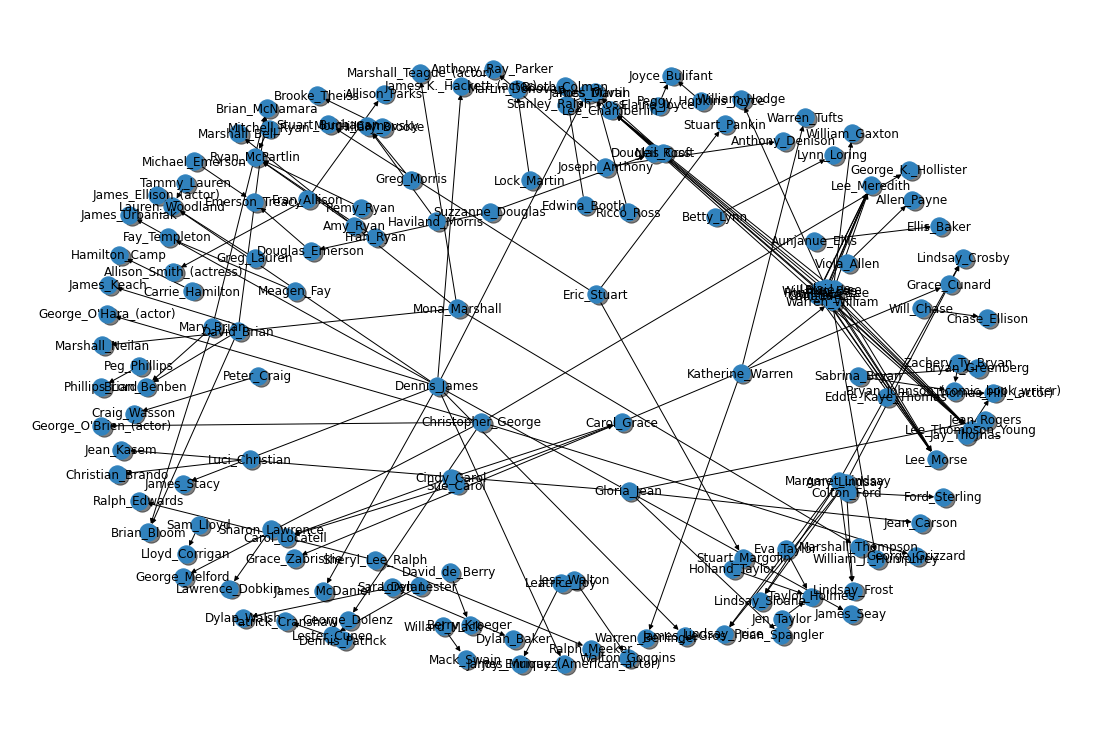

In [255]:
# remove isolated nodes
G.remove_nodes_from(list(nx.isolates(G)))

#pos = nx.layout.spiral_layout(G)
pos = nx.spring_layout(G, pos=pos, k=0.2, seed=132, iterations=50) 

# create position copies for shadows, and shift shadows
pos_shadow = copy.deepcopy(pos)
shift_amount = 0.006
for idx in pos_shadow:
  pos_shadow[idx][0] += shift_amount
  pos_shadow[idx][1] -= shift_amount


# draw the graph

fig = plt.figure(frameon=False)
ax = fig.add_axes([0,0,1,1])
ax.axis('off')

nx.draw_networkx_nodes(G, pos_shadow, node_color='k', alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color="#3182bd", linewidths=1)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, width=1)
plt.show()